# The Neural Network ,That i'll implement is Shown Bellow in Image :

<img src='https://i.imgur.com/seSGbNS.png'>

### What It Need's To Implement a Neural Network. 

* Implemnting A Neural Network Mailny Consists 3 Parts :::

1. Implement ForWard Propagation.

2. Implemnt BackWord Propagation.

3. Implement The Optimizers For Your Neural Network. Here We will Implement 3 types of Optimizers.
                 * Gradient Descent 
                 * Gradient Descent With Momentum
                 * Adam Optimizer

### Let's Load the Data First : 

In [ ]:
import pickle
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import pandas as pd

with open('data.pkl', 'rb') as f:
    data = pickle.load(f)
print(data.shape)
X = data[:, :5]
y = data[:, -1]
print(X.shape, y.shape)

## Part-1 : Forward propagation

In [22]:
def sigmoid(z):
    return 1 / (1+ np.exp(-z))

In [23]:
def forward_propagation(x,y,w):
    
    a = w[0]*x[0]
    b = w[1]*x[1]
    c = a+b
    d = a+b
    e = c*d
    f = w[5]+e
    exp = np.exp(f)
    
    g = exp + w[6]
    tanh = np.tanh(g)
    
    h = np.sin((w[2]*x[2]))
    i = (w[3]*x[3]) + (w[4]*x[4])
    j = h*i
    k = (w[7]+j)
    sigh = sigmoid(k)
    
    # y^ computation
    l = w[8]*sigh
    y_hat = tanh + l
    # Computing loss
    loss = (y_hat - y)**2
    # compute derivative of L  w.r.to Y' and storing it in dl
    dl = 2*(y_hat - y)
    # Creating dictionary
    dict_ = {"dl": dl , "loss":loss , "exp":exp , "tanh":tanh , "sigmoid":sigh}
    
    return dict_

## Part-2 : Backward Propagation

In [26]:
def backward_propagation(x,W,dict_):
    dw9 = ((dict_.get("dl"))*dict_.get("sigmoid")*1)
    dw8 = ((dict_.get("dl"))*(w[8])*(dict_.get("sigmoid")*(1-(dict_.get("sigmoid")))))
    dw7 = ((dict_.get("dl"))*(1-(dict_.get("tanh")**2)))
    dw6 = ((dict_.get("dl"))*(1-(dict_.get("tanh")**2)))*(dict_.get("exp"))
    dw5 = ((dw8)*(np.sin((w[2]*x[2])))*(x[4]))
    dw4 = ((dw8)*(np.sin((w[2]*x[2])))*(x[3]))
    dw3 = ((dw8)*((x[3]*w[3])+(x[4]*w[4]))*(np.cos((w[2]*x[2])))*(x[2]))
    dw2 = ((dict_.get("dl")*(1-((dict_.get("tanh"))**2))*(dict_.get("exp"))*(2*((w[0]*x[0])+(w[1]*x[1])))*(x[1])))
    dw1 = ((dict_.get("dl")*(1-((dict_.get("tanh"))**2))*(dict_.get("exp"))*(2*((w[0]*x[0])+(w[1]*x[1])))*(x[0])))
    
    dervt_dict = {"dw1":dw1 , "dw2": dw2, "dw3": dw3, "dw4": dw4, "dw5":dw5 , 
                      "dw6":dw6 , "dw7":dw7 , "dw8":dw8 , "dw9":dw9 }
    
    return dervt_dict

## Part-3 : Implementing Diffrent Deep Learning Optimizers.

### <font color='green'>1. Gradient Decent.</font>

In [31]:
from tqdm import tqdm
learning_rate = 0.01
W = np.random.normal(loc=0.0, scale=0.1, size=9)
epochs = list(i for i in range(100))
epoch_losses = []
for epoch in tqdm(epochs):
    loss = 0 
    for data_point_index in range(len(X)):
        dict1 = forward_propagation(X[data_point_index],y[data_point_index],W)
        dws_dict =  backward_propagation(X[data_point_index],W,dict1)
        old_weights_derivatives = [dws_dict.get(i) for i in dws_dict]
        # getting loss with current weights
        loss = loss + (dict1.get("loss"))
        # updating weights
        
        w1 = ((W[0]) - (learning_rate*(old_weights_derivatives[0])))
        w2 = ((W[1]) - (learning_rate*(old_weights_derivatives[1])))
        w3 = ((W[2]) - (learning_rate*(old_weights_derivatives[2])))
        w4 = ((W[3]) - (learning_rate*(old_weights_derivatives[3])))
        w5 = ((W[4]) - (learning_rate*(old_weights_derivatives[4])))
        w6 = ((W[5]) - (learning_rate*(old_weights_derivatives[5])))
        w7 = ((W[6]) - (learning_rate*(old_weights_derivatives[6])))
        w8 = ((W[7]) - (learning_rate*(old_weights_derivatives[7])))
        w9 = ((W[8]) - (learning_rate*(old_weights_derivatives[8])))
        
        W = [w1,w2,w3,w4,w5,w6,w7,w8,w9]
        
    epoch_losses.append((loss/len(X)))

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:04<00:00, 20.07it/s]


<function matplotlib.pyplot.show(*args, **kw)>

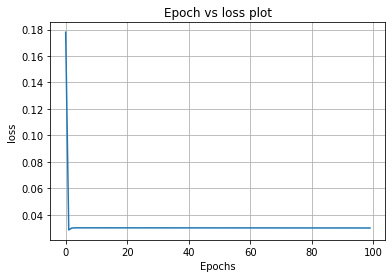

In [32]:
# Plot between epochs and loss
import matplotlib.pyplot as plt

plt.grid()
plt.plot(epochs,epoch_losses)
plt.title("Epoch vs loss plot")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.show

### <font color='green'>2. Gradient Decent with Momentum.</font>

In [33]:
def get_vt(old_derivative_list):
    learning_rate = 0.01
    lambdaa = 0.9
    old_derivative_list.reverse()
    vt = 0
    for i in range(len(old_derivative_list)):
        vt = vt + ((lambdaa**i)* (learning_rate*old_derivative_list[i]))
        
    return vt

In [34]:
from tqdm import tqdm
learning_rate = 0.01
W = np.random.normal(loc=0.0, scale=0.1, size=9)
epochs = list(i for i in range(100))
epoch_losses = []
for epoch in tqdm(epochs):
    loss = 0 
    old_weights_derivatives_of_w1 = []
    old_weights_derivatives_of_w2 = []
    old_weights_derivatives_of_w3 = []
    old_weights_derivatives_of_w4 = []
    old_weights_derivatives_of_w5 = []
    old_weights_derivatives_of_w6 = []
    old_weights_derivatives_of_w7 = []
    old_weights_derivatives_of_w8 = []
    old_weights_derivatives_of_w9 = []
    for data_point_index in range(len(X)):
        dict1 = forward_propagation(X[data_point_index],y[data_point_index],W)
        dws_dict =  backward_propagation(X[data_point_index],W,dict1)
        old_weights_derivatives = [dws_dict.get(i) for i in dws_dict]
        # getting loss with current weights
        loss = loss + (dict1.get("loss"))
        # storing old derivatives weights
        
        old_weights_derivatives_of_w1.append(old_weights_derivatives[0])
        old_weights_derivatives_of_w2.append(old_weights_derivatives[1])
        old_weights_derivatives_of_w3.append(old_weights_derivatives[2])
        old_weights_derivatives_of_w4.append(old_weights_derivatives[3])
        old_weights_derivatives_of_w5.append(old_weights_derivatives[4])
        old_weights_derivatives_of_w6.append(old_weights_derivatives[5])
        old_weights_derivatives_of_w7.append(old_weights_derivatives[6])
        old_weights_derivatives_of_w8.append(old_weights_derivatives[7])
        old_weights_derivatives_of_w9.append(old_weights_derivatives[8])
        
        # updating weights
        w1 = ((W[0]) - (get_vt(old_weights_derivatives_of_w1)))
        w2 = ((W[1]) - (get_vt(old_weights_derivatives_of_w2)))
        w3 = ((W[2]) - (get_vt(old_weights_derivatives_of_w3)))
        w4 = ((W[3]) - (get_vt(old_weights_derivatives_of_w4)))
        w5 = ((W[4]) - (get_vt(old_weights_derivatives_of_w5)))
        w6 = ((W[5]) - (get_vt(old_weights_derivatives_of_w6)))
        w7 = ((W[6]) - (get_vt(old_weights_derivatives_of_w7)))
        w8 = ((W[7]) - (get_vt(old_weights_derivatives_of_w8)))
        w9 = ((W[8]) - (get_vt(old_weights_derivatives_of_w9)))
        
        W = [w1,w2,w3,w4,w5,w6,w7,w8,w9]
        
    epoch_losses.append((loss/len(X)))

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:43<00:00,  1.64s/it]


<function matplotlib.pyplot.show(*args, **kw)>

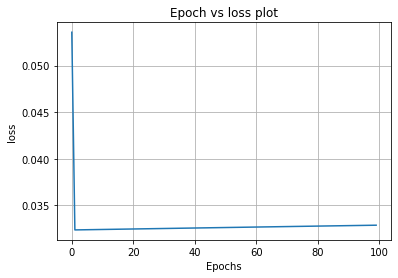

In [35]:
# Plot between epochs and loss
import matplotlib.pyplot as plt

plt.grid()
plt.plot(epochs,epoch_losses)
plt.title("Epoch vs loss plot")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.show

### <font color='green'>3. Implementing Adam Optimizer.</font>

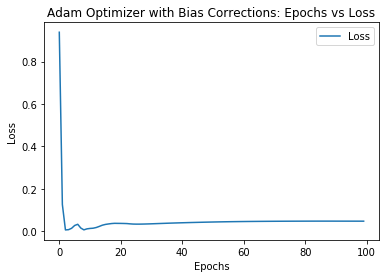

In [20]:
def Adam(X_data,y_data,learning_rate=0.001):
    N = 9 #No of Weight parameters
    w = initilize_randomly_gaussian(N)
    epochs = list(range(0,100))
    epoch_loss = np.zeros(len(epochs))
    Beta1 = 0.9
    Beta2 = 0.999
    epsilon = 1e-7
    for epoch in epochs:
        # print("Epoch - ",epoch+1,"/100",end=" ")
        loss = 0
        Mt = np.zeros(N)
        Vt = np.zeros(N)
        for t, (X,y) in enumerate(zip(X_data,y_data)):
            dict_loss=forward_propagation(X,y,w)
            dict_Weights=backward_propagation(X,w,dict_loss)
            grad = gradients_to_vector(dict_Weights)
            Mt = Beta1*Mt + (1-Beta1)*grad
            Vt = Beta2*Vt + (1-Beta2)*np.square(grad)
            Mt_hat = Mt /(1 - np.power(Beta1,t+1))
            Vt_hat = Vt /(1 - np.power(Beta2,t+1))
            w = w - learning_rate*Mt_hat/(np.sqrt(Vt_hat) + epsilon)
            loss += np.square(dict_loss["loss"])
        epoch_loss[epoch] = loss/len(y_data)
        # print("Loss - ",'%.4e' % MSEloss[epoch])
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid()
    plt.title("Adam Optimizer : Epochs vs Loss")
    plt.plot(epochs,epoch_loss)
    plt.legend(["Loss"])
    return MSEloss

Adam_loss = Adam(X,y)

# Thanks For Coming..!!  :)